## Load the Data

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
train_df = pd.read_csv(r"C:\Users\welcome\Data Science\Python\Data\tag_identification_dataset  - train.csv")

In [3]:
# Display dataframe
train_df.head()

,post_id,question,user_stage,tag
0,1,"Alhamdulilh, blessed with beautiful baby girl,...",pregnant,Announcements&Celebrations
1,2,Breastfeeding mother ko chai pini chaiye usse ...,mother,General Baby
2,3,Hii all as I am preganent with twins on coming...,pregnant,General Pregnancy
3,4,Mujhy mild cramp sa feeling Hai lower main aur...,pregnant,General Pregnancy
4,5,Can I drink lion dates syrup,pregnant,Diet&Nutrition


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   post_id     107 non-null    int64 
 1   question    107 non-null    object
 2   user_stage  107 non-null    object
 3   tag         107 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.5+ KB


In [5]:
train_df['user_stage'].value_counts()

pregnant    59
mother      41
ttc          7
Name: user_stage, dtype: int64

In [6]:
pd.crosstab(train_df['user_stage'], train_df['tag'])

tag,Announcements&Celebrations,Diet&Nutrition,General Baby,General Pregnancy,Gossip,Love&Relationships,MyloSupport
user_stage,,,,,,,
mother,10,3,15,0,4,3,6
pregnant,3,14,0,18,9,4,11
ttc,0,1,0,0,0,4,2


In [7]:
train_df['tag'].value_counts()

MyloSupport                   19
General Pregnancy             18
Diet&Nutrition                18
General Baby                  15
Gossip                        13
Announcements&Celebrations    13
Love&Relationships            11
Name: tag, dtype: int64

It has Six Classes : MyloSupport, Diet&Nutrition, General Pregnancy, General Baby, Announcements&Celebrations, Gossip, Love&Relationships

In [8]:
# Label Encoding for Target variable
train_df['tag'] = train_df['tag'].map({'MyloSupport':0, 'Diet&Nutrition':1, 'General Pregnancy':2, 
                 'General Baby':3, 'Announcements&Celebrations':4, 'Gossip':5, 'Love&Relationships':6})

## Preprocessing for Text Data
Preprocessing steps:

1. Removing special characters
2. Convert sentence into lower case
3. Remove Stop Words
4. Stemming or converting words to their root 

In [9]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [10]:
# text cleaning
def clean_text(text):
    text=re.sub(r"[^\w\s]",'',text,re.UNICODE)
    text=text.lower()
    text=[lemmatizer.lemmatize(token) for token in text.split(" ")]
    text=[lemmatizer.lemmatize(token,"v") for token in text]
    text=[word for word in text if not word in stop_words]
    text=" ".join(text)
    return text

In [11]:
# tokens column contains all tokens
train_df['tokens'] = train_df['question'].apply(lambda x: clean_text(str(x)))

In [12]:
train_df['tokens'][0]

'alhamdulilh bless beautiful baby girl cesarean'

In [13]:
train_df.head()

,post_id,question,user_stage,tag,tokens
0,1,"Alhamdulilh, blessed with beautiful baby girl,...",pregnant,4,alhamdulilh bless beautiful baby girl cesarean
1,2,Breastfeeding mother ko chai pini chaiye usse ...,mother,3,breastfeed mother ko chai pini chaiye usse bac...
2,3,Hii all as I am preganent with twins on coming...,pregnant,2,hii preganent twin come 27 feb dr suggest c se...
3,4,Mujhy mild cramp sa feeling Hai lower main aur...,pregnant,2,mujhy mild cramp sa feel hai lower main aur ur...
4,5,Can I drink lion dates syrup,pregnant,1,drink lion date syrup


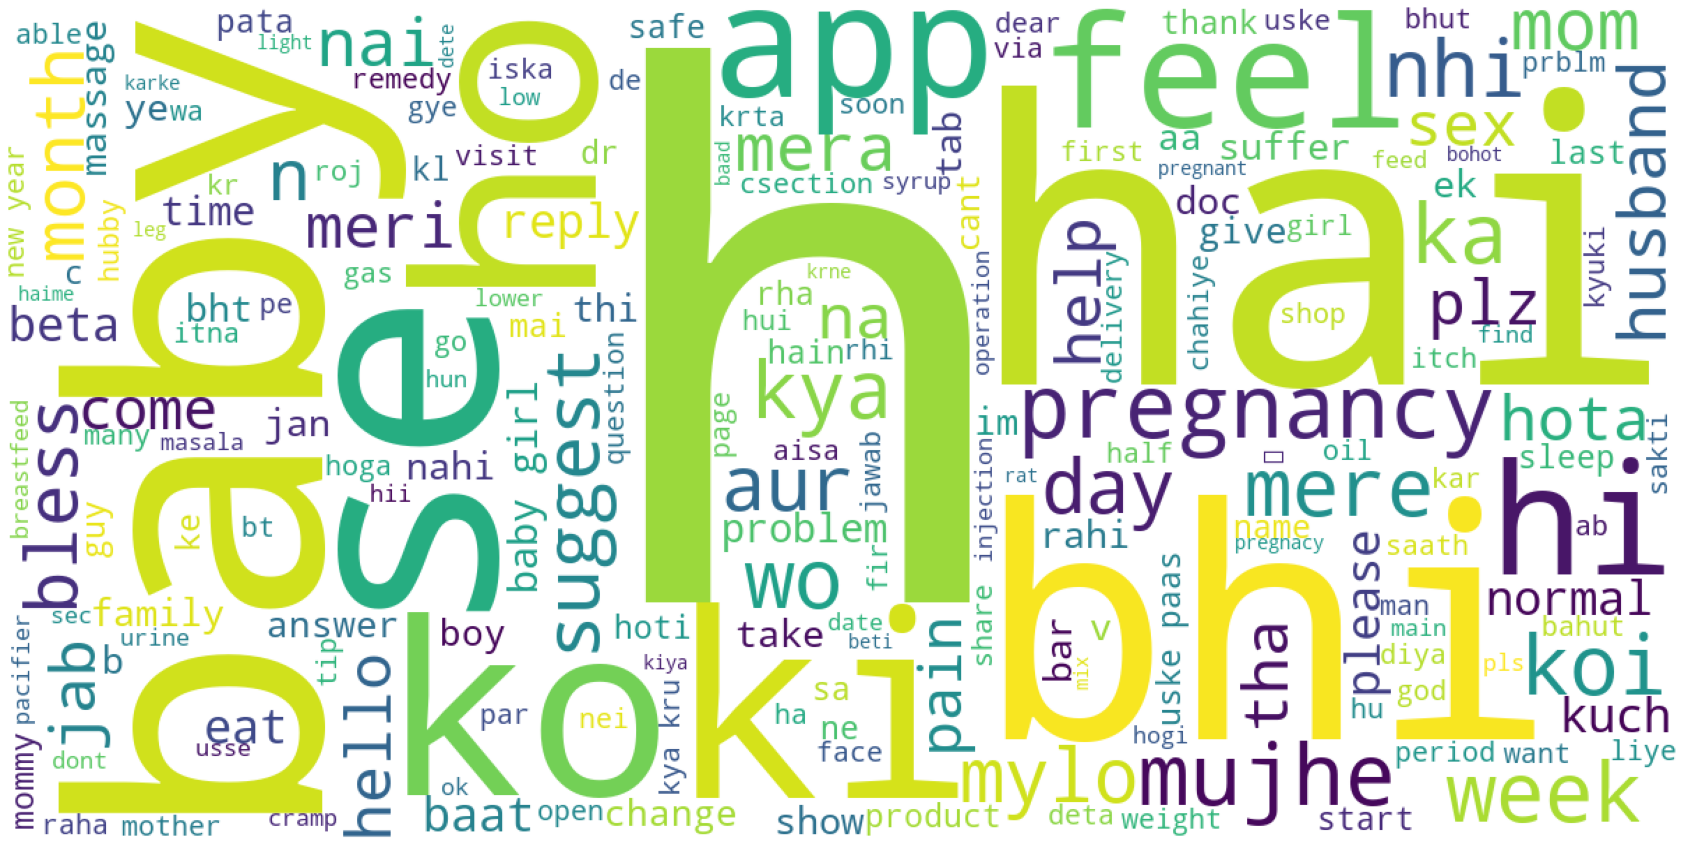

In [14]:
from wordcloud import WordCloud
words = ' '.join(train_df['tokens'])
wordcloud = WordCloud(background_color='white',width = 1200, height = 600).generate(words)
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,3))

In [69]:
vect_data = vect.fit_transform(train_df['tokens'])

In [70]:
vect_data = vect_data.toarray()

In [71]:
vect_data[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
target = train_df['tag']

In [73]:
print(vect_data[0])
print(target[0])

[0 0 0 ... 0 0 0]
4


In [74]:
print(vect_data.shape)
print(target.shape)

(107, 4302)
(107,)


In [75]:
feature_names = vect.get_feature_names()
print(feature_names.__len__())
print(feature_names[0:10])

4302
['100', '100 accurate', '10th', '10th march', '10th march ko', '11', '11 week', '11 week pregnancy', '11month', '11month ka']


## Model Building and Evaluation

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vect_data, target, test_size = 0.20, random_state=0)

In [77]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(85, 4302) (22, 4302) (85,) (22,)


In [78]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)
SVM.score(X_test, y_test)

0.2727272727272727

In [79]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN.score(X_train, y_train)

0.32941176470588235

In [80]:
from sklearn.naive_bayes  import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
NB.score(X_test, y_test)

0.5909090909090909

In [81]:
import joblib
joblib.dump(NB, 'naive_bayes.pkl')
joblib.dump(vect, 'vect.pkl')

['vect.pkl']

In [82]:
model = joblib.load('naive_bayes.pkl')
vect = joblib.load('vect.pkl')

In [83]:
def predict_class(x):
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    import re
    
    def clean_text(text):
        text=re.sub(r"[^\w\s]",'',text,re.UNICODE)
        text=text.lower()
        text=[lemmatizer.lemmatize(token) for token in text.split(" ")]
        text=[lemmatizer.lemmatize(token,"v") for token in text]
        text=[word for word in text if not word in stop_words]
        text=" ".join(text)
        return text
    
    clean_data = clean_text(x)
    vect_data = vect.transform([clean_data])
    vect_data = vect_data.toarray()
    output = model.predict(vect_data)
    if int(output) == 0:
        return 'MyloSupport'
    elif int(output) == 1:
        return 'Diet&Nutrition'
    elif int(output) == 2:
        return 'General Pregnancy'
    elif int(output) == 3:
        return 'General Baby'
    elif int(output) == 4:
        return 'Announcements&Celebrations'
    elif int(output) == 5:
        return 'Gossip'
    elif int(output) == 6:
        return 'Love&Relationships'
    
    

In [84]:
test_df = pd.read_csv(r"C:\Users\welcome\Data Science\Python\Data\tag_identification_dataset  - test.csv")

In [85]:
test_df['question'].apply(predict_class)

0                    MyloSupport
1              General Pregnancy
2             Love&Relationships
3                   General Baby
4                   General Baby
5              General Pregnancy
6              General Pregnancy
7              General Pregnancy
8              General Pregnancy
9              General Pregnancy
10             General Pregnancy
11                Diet&Nutrition
12             General Pregnancy
13                Diet&Nutrition
14                        Gossip
15                  General Baby
16    Announcements&Celebrations
17            Love&Relationships
18    Announcements&Celebrations
19             General Pregnancy
20                Diet&Nutrition
21                   MyloSupport
22                  General Baby
23            Love&Relationships
24                  General Baby
25                   MyloSupport
26    Announcements&Celebrations
27                   MyloSupport
28             General Pregnancy
29                   MyloSupport
30        